### ANGGOTA KELOMPOK H COMPFEST 15 : <br>
| BIDANG | NAMA |
|---------|-----------|
| DSA | Laticia Jessie Laksana |
| DSA | Hutari Andini |
| DSA | Natassya Marchelina Cahya Setyaji |
| DSA | Balqis Dwian Fitri Zamzami |
| UXA | Jason Jahja |
| UXA | Wevi Rahmadani |
| PMA | Joan Isva |
| PMA | Michael Sihotang |
| SEA | Lutfian Rahdiansyah |
| SEA | Reynold Putra Merdeka |

# <center> Final Study Case : TITLE

# Objective :

1. Bagaimana analisis statistik deskriptif dari dataset yang digunakan?
2. Bagaimana tingkat PM2.5 dan PM10 bervariasi dari waktu ke waktu?
3. Korelasi antara suhu ataupun humiditas dengan tingkat PM2.5 dan PM 10
4.
5.


# Import Library

In [ ]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

**View Data**

In [ ]:
df = pd.read_csv("raw_air_pollution_data_2023.csv")
df.head()

,date,um100,um025,pm1,pm25,um010,pm10,um003,temperature,um050,um005,pressure,humidity,locationId,location,latitude,longitude,country
0,2023-01-01T15:00:00+07:00,0.001667,0.113333,25.833333,36.333333,2.445000,42.400000,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
1,2023-01-01T16:00:00+07:00,0.000000,0.046667,16.766667,21.800000,1.228333,23.050000,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
2,2023-01-01T17:00:00+07:00,0.000000,0.042414,19.251724,24.296552,1.229310,25.196552,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
3,2023-01-01T18:00:00+07:00,0.000000,0.047000,20.863333,26.783333,1.361667,27.993333,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
4,2023-01-01T19:00:00+07:00,0.000667,0.094333,24.936667,33.813333,1.889667,38.106667,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID


**Checking data shape**

In [ ]:
df.shape

(14362, 18)

**Checking data types**

In [ ]:
df.dtypes

date            object
um100          float64
um025          float64
pm1            float64
pm25           float64
um010          float64
pm10           float64
um003          float64
temperature    float64
um050          float64
um005          float64
pressure       float64
humidity       float64
locationId       int64
location        object
latitude       float64
longitude      float64
country         object
dtype: object

**Change date to datetime**

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

date           datetime64[ns, pytz.FixedOffset(420)]
um100                                        float64
um025                                        float64
pm1                                          float64
pm25                                         float64
um010                                        float64
pm10                                         float64
um003                                        float64
temperature                                  float64
um050                                        float64
um005                                        float64
pressure                                     float64
humidity                                     float64
locationId                                     int64
location                                      object
latitude                                     float64
longitude                                    float64
country                                       object
dtype: object

**Extract the date and time into a new column**

In [ ]:
df['tanggal'] = df['date'].dt.strftime('%Y-%m-%d')

df['time'] = df['date'].dt.strftime('%H:%M')

**Sort column**

In [ ]:
sort_column = ['date', 'tanggal', 'time', 'um100', 'um025', 'pm1', 'pm25', 'um010', 'pm10', 'um003', 'temperature', 'um050', 'um005', 'pressure', 'humidity', 'locationId', 'location', 'latitude', 'longitude', 'country']

df = df[sort_column]

In [ ]:
df.head()

,date,tanggal,time,um100,um025,pm1,pm25,um010,pm10,um003,temperature,um050,um005,pressure,humidity,locationId,location,latitude,longitude,country
0,2023-01-01 15:00:00+07:00,2023-01-01,15:00,0.001667,0.113333,25.833333,36.333333,2.445000,42.400000,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
1,2023-01-01 16:00:00+07:00,2023-01-01,16:00,0.000000,0.046667,16.766667,21.800000,1.228333,23.050000,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
2,2023-01-01 17:00:00+07:00,2023-01-01,17:00,0.000000,0.042414,19.251724,24.296552,1.229310,25.196552,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
3,2023-01-01 18:00:00+07:00,2023-01-01,18:00,0.000000,0.047000,20.863333,26.783333,1.361667,27.993333,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
4,2023-01-01 19:00:00+07:00,2023-01-01,19:00,0.000667,0.094333,24.936667,33.813333,1.889667,38.106667,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID


**Unused column drop**

In [ ]:
df.dtypes

date           datetime64[ns, pytz.FixedOffset(420)]
tanggal                                       object
time                                          object
um100                                        float64
um025                                        float64
pm1                                          float64
pm25                                         float64
um010                                        float64
pm10                                         float64
um003                                        float64
temperature                                  float64
um050                                        float64
um005                                        float64
pressure                                     float64
humidity                                     float64
locationId                                     int64
location                                      object
latitude                                     float64
longitude                                    f

In [ ]:
df.head()

,date,tanggal,time,um100,um025,pm1,pm25,um010,pm10,um003,temperature,um050,um005,pressure,humidity,locationId,location,latitude,longitude,country
0,2023-01-01 15:00:00+07:00,2023-01-01,15:00,0.001667,0.113333,25.833333,36.333333,2.445000,42.400000,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
1,2023-01-01 16:00:00+07:00,2023-01-01,16:00,0.000000,0.046667,16.766667,21.800000,1.228333,23.050000,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
2,2023-01-01 17:00:00+07:00,2023-01-01,17:00,0.000000,0.042414,19.251724,24.296552,1.229310,25.196552,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
3,2023-01-01 18:00:00+07:00,2023-01-01,18:00,0.000000,0.047000,20.863333,26.783333,1.361667,27.993333,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID
4,2023-01-01 19:00:00+07:00,2023-01-01,19:00,0.000667,0.094333,24.936667,33.813333,1.889667,38.106667,NaN,NaN,NaN,NaN,NaN,NaN,354662,Regatta The Icon,-6.09474,106.79309,ID


**Handling Missing Values**

In [ ]:
df.isna().sum()

date              0
tanggal           0
time              0
um100             0
um025             0
pm1               0
pm25              0
um010             0
pm10              0
um003          6666
temperature    6663
um050          6666
um005          6666
pressure       6666
humidity       6666
locationId        0
location          0
latitude          0
longitude         0
country           0
dtype: int64

In [ ]:
df.dropna(subset=["um050"], axis=0)
df[['um003', 'temperature','um005','pressure','humidity']] = df[['um003', 'temperature','um005','pressure','humidity']].fillna(df[['um003', 'temperature','um005','pressure','humidity']].median())

In [ ]:
df.isna().sum()

date              0
tanggal           0
time              0
um100             0
um025             0
pm1               0
pm25              0
um010             0
pm10              0
um003             0
temperature       0
um050          6666
um005             0
pressure          0
humidity          0
locationId        0
location          0
latitude          0
longitude         0
country           0
dtype: int64

In [ ]:
# unused column drop
df = df.drop(columns=['um050'])

In [ ]:
df.isna().sum()

date           0
tanggal        0
time           0
um100          0
um025          0
pm1            0
pm25           0
um010          0
pm10           0
um003          0
temperature    0
um005          0
pressure       0
humidity       0
locationId     0
location       0
latitude       0
longitude      0
country        0
dtype: int64

**Checking Duplicate Data**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(14362, 19)

In [ ]:
# Drop unused columns

drop = ['um100',	'um025',	'pm1', 'um010', 'um003', 'um005', 'pressure', 'locationId', 'country']
df1 = df.drop(columns=drop)

In [ ]:
# syarat sesuai BMKG
conditionspm25 = [
    (df1['pm25'] <= 15.5),
    (df1['pm25'] > 15.5) & (df1['pm25'] <= 55.4),
    (df1['pm25'] > 55.4) & (df1['pm25'] <= 150.4),
    (df1['pm25'] > 150.4) & (df1['pm25'] <= 250.4),
    (df1['pm25'] > 250.4)
    ]

conditionspm10 = [
    (df1['pm25'] <= 50),
    (df1['pm25'] > 50) & (df1['pm25'] <= 150),
    (df1['pm25'] > 150) & (df1['pm25'] <= 350),
    (df1['pm25'] > 350) & (df1['pm25'] <= 420),
    (df1['pm25'] > 420)
    ]

values = ['baik', 'sedang', 'tidak sehat', 'sangat tidak sehat', 'berbahaya']


df1['kategori pm25'] = np.select(conditionspm25, values)
df1['kategori pm10'] = np.select(conditionspm10, values)

df1

,date,tanggal,time,pm25,pm10,temperature,humidity,location,latitude,longitude,kategori pm25,kategori pm10
0,2023-01-01 15:00:00+07:00,2023-01-01,15:00,36.333333,42.400000,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik
1,2023-01-01 16:00:00+07:00,2023-01-01,16:00,21.800000,23.050000,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik
2,2023-01-01 17:00:00+07:00,2023-01-01,17:00,24.296552,25.196552,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik
3,2023-01-01 18:00:00+07:00,2023-01-01,18:00,26.783333,27.993333,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik
4,2023-01-01 19:00:00+07:00,2023-01-01,19:00,33.813333,38.106667,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik
...,...,...,...,...,...,...,...,...,...,...,...,...
14357,2023-09-03 10:00:00+07:00,2023-09-03,10:00,41.536667,47.180000,91.266667,51.566667,Kelurahan Galur,-6.175558,106.85440,sedang,baik
14358,2023-09-03 11:00:00+07:00,2023-09-03,11:00,43.485185,49.229630,92.592593,45.592593,Kelurahan Galur,-6.175558,106.85440,sedang,baik
14359,2023-09-03 12:00:00+07:00,2023-09-03,12:00,37.760000,44.080000,94.066667,42.533333,Kelurahan Galur,-6.175558,106.85440,sedang,baik
14360,2023-09-03 13:00:00+07:00,2023-09-03,13:00,23.886667,30.910000,95.066667,42.966667,Kelurahan Galur,-6.175558,106.85440,sedang,baik


# Exploratory Data Analysis

**Statistic Descriptive**

In [ ]:
df1.describe()

,pm25,pm10,temperature,humidity,latitude,longitude
count,14362.000000,14362.000000,14362.000000,14362.000000,14362.000000,14362.000000
mean,67.207791,73.942484,87.193301,58.122836,-6.129139,106.826198
std,188.367618,188.585636,6.718803,6.951730,0.023841,0.023796
min,0.090000,0.205000,73.000000,21.480000,-6.175558,106.793090
25%,26.430000,28.819598,88.069581,57.349105,-6.146273,106.816320
50%,42.922500,51.900000,88.724138,58.365152,-6.124591,106.816320
75%,55.630000,66.848707,89.000000,59.407407,-6.124591,106.851210
max,1756.575000,1760.100000,109.500000,76.033333,-6.094740,106.854400


Hasil analisis statistic descriptive :

**PM2.5 by Month**

In [ ]:
df1['tanggal'] = pd.to_datetime(df1['tanggal'])
df1['month'] = df1['tanggal'].dt.month

month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df1['month'] = df1['month'].map(month_mapping)


In [ ]:
fig = px.histogram(df1, x='month', y='pm25', title='Bar Chart of sum pm25 by Month', color_discrete_sequence=px.colors.sequential.Blues_r)

fig.update_xaxes(title='Month')
fig.update_yaxes(title='PM2.5')
fig.show()

**PM10 by Month**

In [ ]:
fig = px.histogram(df1, x='month', y='pm10', title='Bar Chart of sum pm10 by Month', color_discrete_sequence=px.colors.sequential.Blues_r)

fig.update_xaxes(title='Month')
fig.update_yaxes(title='PM10')
fig.show()

Hasil analisis tingkat PM2.5 dan PM10 bervariasi dari waktu ke waktu terlihat pada bulan `Agustus` memiliki jumlah polusi udara atau tingkatan pm2.5 dan pm10 terbanyak dari bulan sebelumnya. Perlu diketahui juga untuk bulan september hanya sedikit yang tercatat karena keterbatasan data yang dimiliki

**PM2.5 by Location**

In [ ]:
custom_color_palette = ['#b1d9ff', '#90c4ff', '#6bbcff', '#4aa5f0', '#2d9ced']

fig = px.histogram(df1, x='location', y='pm25', title='Bar Chart of sum pm25 by Location',
                   color='location', # Use the 'location' column for coloring
                   color_discrete_sequence=custom_color_palette)  # Specify your custom color palette

fig.update_xaxes(title='Location')
fig.update_yaxes(title='pm25')
fig.show()

**PM10 by Location**

In [ ]:
custom_color_palette = ['#b1d9ff', '#90c4ff', '#6bbcff', '#4aa5f0', '#2d9ced']

fig = px.histogram(df1, x='location', y='pm10', title='Bar Chart of sum pm25 by Location',
                   color='location', # Use the 'location' column for coloring
                   color_discrete_sequence=custom_color_palette)  # Specify your custom color palette

fig.update_xaxes(title='Location')
fig.update_yaxes(title='pm25')
fig.show()

Hasil analisis : terlihat pada dataset yang digunakan hanya terdapat 5 lokasi yang mana semua berada di Jakarta dan di LTC Glodok tercatat paling banyak terkena polusi udara. Dari chartdi atas kita juga dapat mengetahui rata-rata PM2.5 di LTC Glodok setiap bulannya.

**Avg. PM2.5 in LTC Glodok**

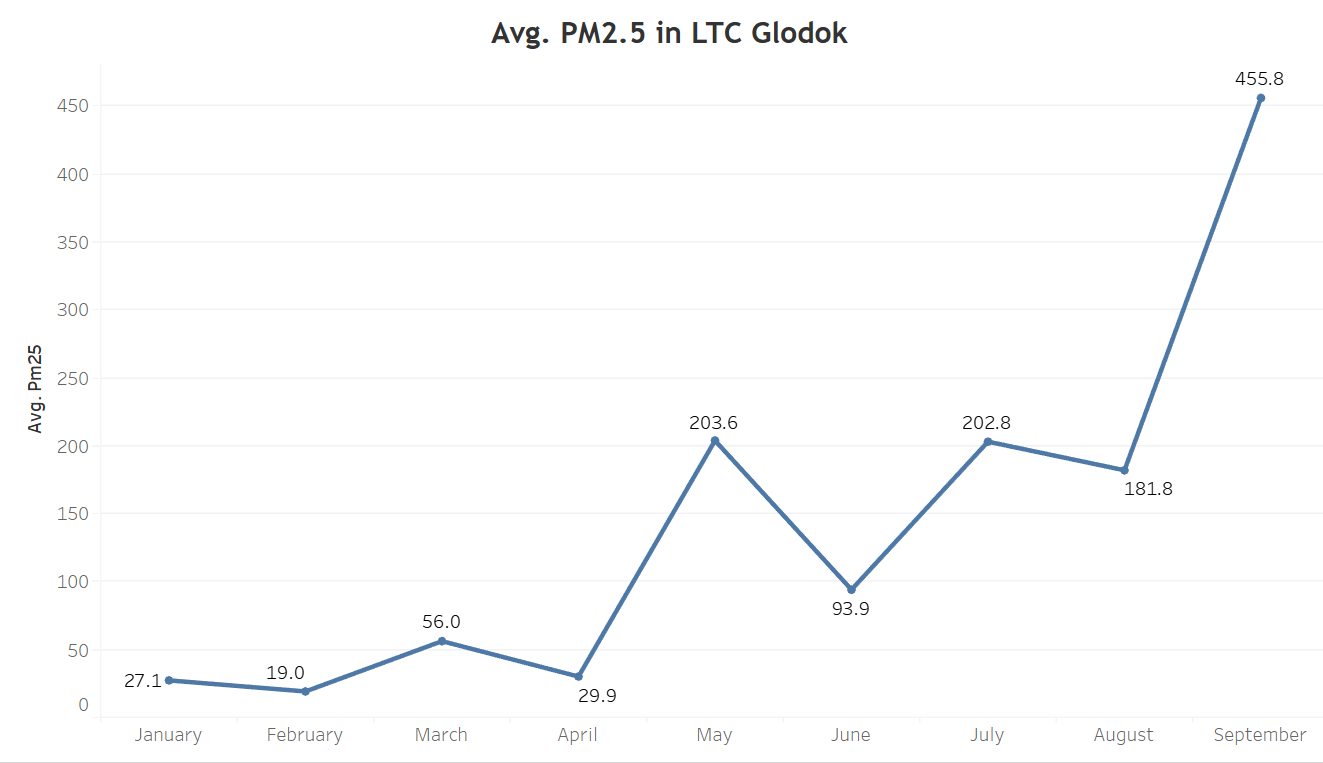

Hasil analisis :

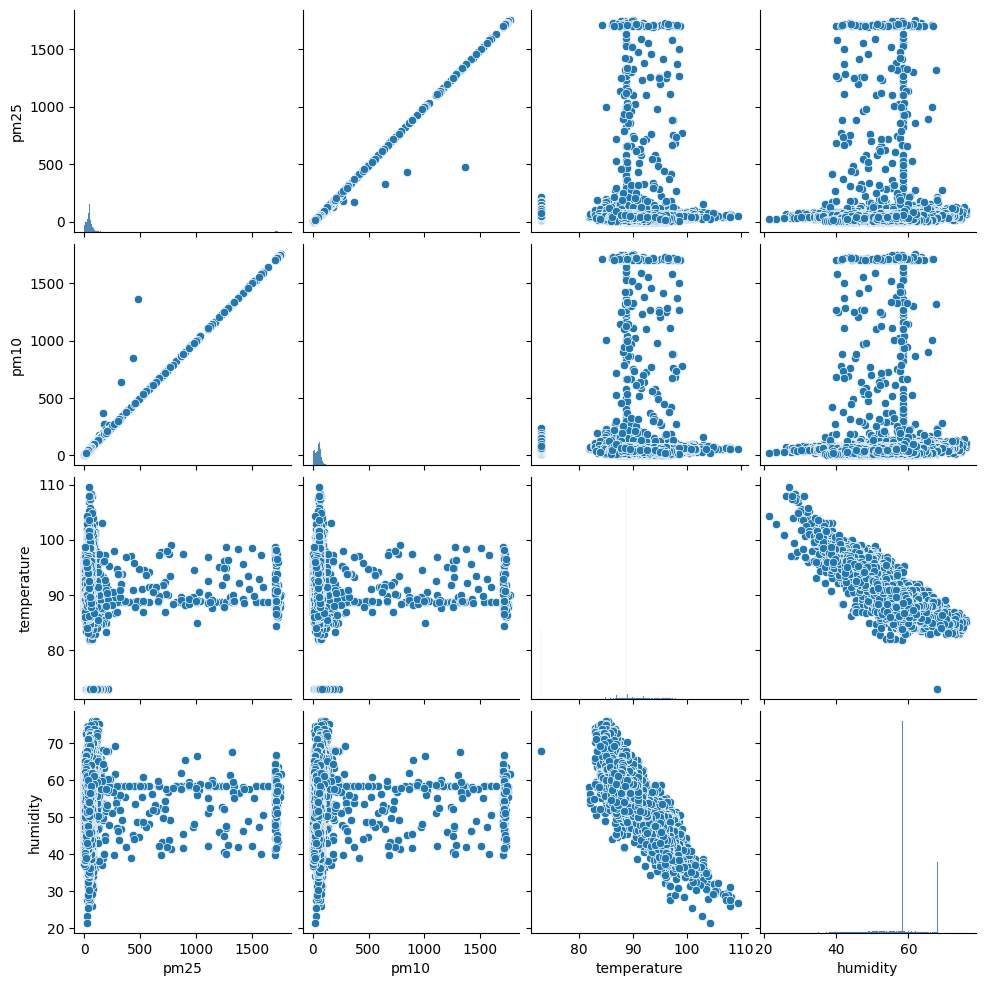

In [ ]:
cols = ['pm25',	'pm10',	'temperature',	'humidity']
X = df1[cols]
sns.pairplot(X)
plt.show()

<ipython-input-117-2707a1359411>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



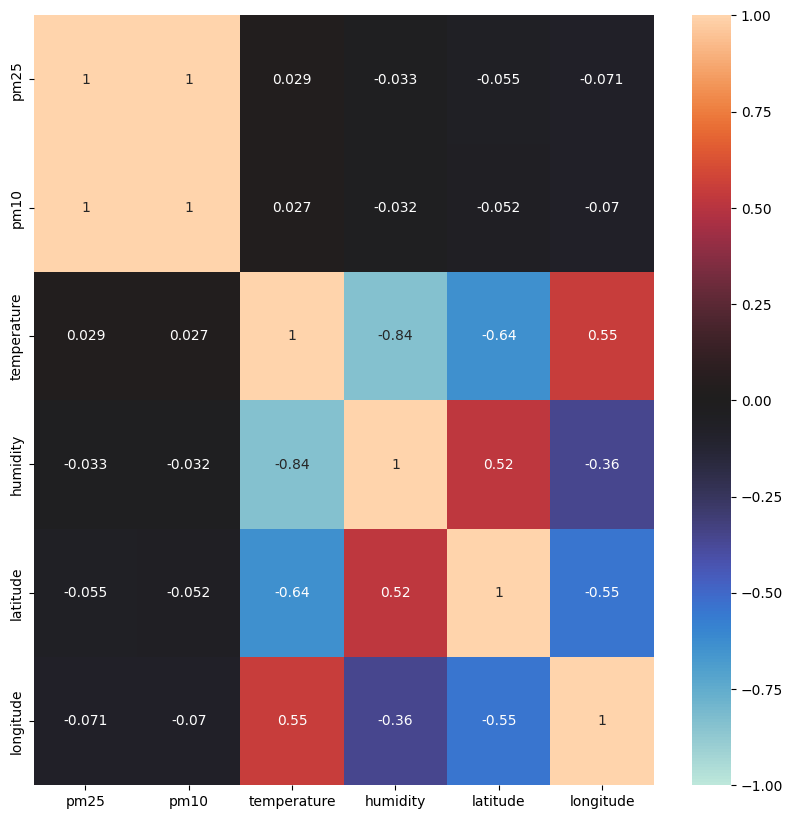

In [ ]:
# Heatmap korelasi features
corr = df1.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True)
plt.show()

In [ ]:
# Bar Chart pm2.5 Category
category_countspm25 = df1['kategori pm25'].value_counts().reset_index()
category_countspm25.columns = ['Category', 'Count']

# Create an interactive bar chart using Plotly Express
fig = px.bar(category_countspm25, x='Category', y='Count', color='Category',
             title='Bar Chart for pm25 Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Count')

In [ ]:
category_countspm10 = df1['kategori pm10'].value_counts().reset_index()
category_countspm10.columns = ['Category', 'Count']

# Create an interactive bar chart using Plotly Express
fig = px.bar(category_countspm10, x='Category', y='Count', color='Category',
             title='Bar Chart for pm10 Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Count')

In [ ]:
df1.groupby('location').mean()

<ipython-input-120-a587cbaf5a19>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,pm25,pm10,temperature,humidity,latitude,longitude
location,,,,,,
Ancol,46.263205,54.015400,89.390401,57.516433,-6.124591,106.85121
Angkasa-Kemayoran,37.462842,42.115601,89.857820,55.614803,-6.155982,106.84253
Kelurahan Galur,14.127958,20.470504,91.612503,53.609878,-6.175558,106.85440
LTC Glodok,124.909806,130.964375,90.331137,54.988638,-6.146273,106.81632
Regatta The Icon,50.460139,57.560606,78.763306,64.468577,-6.094740,106.79309


In [ ]:
df_ancol=df1.loc[ df1['location'] == "Ancol" ]
df_ancol

,date,tanggal,time,pm25,pm10,temperature,humidity,location,latitude,longitude,kategori pm25,kategori pm10,month
3555,2023-01-01 15:00:00+07:00,2023-01-01,15:00,34.086207,39.389655,88.724138,58.365152,Ancol,-6.124591,106.85121,sedang,baik,January
3556,2023-01-01 16:00:00+07:00,2023-01-01,16:00,28.716667,32.373333,88.724138,58.365152,Ancol,-6.124591,106.85121,sedang,baik,January
3557,2023-01-01 17:00:00+07:00,2023-01-01,17:00,19.716667,20.750000,88.724138,58.365152,Ancol,-6.124591,106.85121,sedang,baik,January
3558,2023-01-01 18:00:00+07:00,2023-01-01,18:00,19.830000,20.823333,88.724138,58.365152,Ancol,-6.124591,106.85121,sedang,baik,January
3559,2023-01-01 19:00:00+07:00,2023-01-01,19:00,25.733333,27.036667,88.724138,58.365152,Ancol,-6.124591,106.85121,sedang,baik,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8110,2023-09-03 10:00:00+07:00,2023-09-03,10:00,59.810000,69.610000,94.700000,45.166667,Ancol,-6.124591,106.85121,tidak sehat,sedang,September
8111,2023-09-03 11:00:00+07:00,2023-09-03,11:00,65.636667,73.543333,94.666667,42.466667,Ancol,-6.124591,106.85121,tidak sehat,sedang,September
8112,2023-09-03 12:00:00+07:00,2023-09-03,12:00,69.914286,76.925000,94.964286,46.000000,Ancol,-6.124591,106.85121,tidak sehat,sedang,September
8113,2023-09-03 13:00:00+07:00,2023-09-03,13:00,61.876667,71.050000,96.633333,40.766667,Ancol,-6.124591,106.85121,tidak sehat,sedang,September


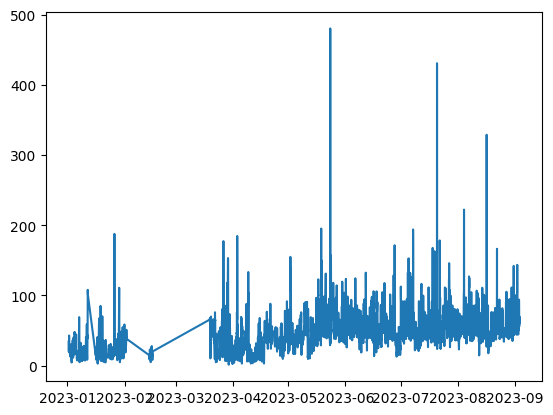

In [ ]:
plt.plot(df_ancol['date'], df_ancol['pm25'])

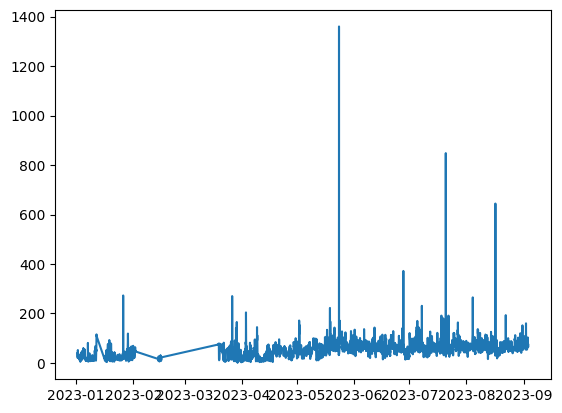

In [ ]:
plt.plot(df_ancol['date'], df_ancol['pm10'])

In [ ]:
df_ancol_mean=df_ancol.groupby('month').mean()
df_ancol_mean

<ipython-input-124-b71c6c260491>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,pm25,pm10,temperature,humidity,latitude,longitude
month,,,,,,
April,32.157492,37.445022,88.724138,58.365152,-6.124591,106.85121
August,56.683885,66.273898,90.295644,54.257677,-6.124591,106.85121
February,21.798501,24.918595,88.724138,58.365152,-6.124591,106.85121
January,23.640057,26.920620,88.724138,58.365152,-6.124591,106.85121
July,57.272464,67.120980,89.644840,56.434917,-6.124591,106.85121
June,53.376324,62.378883,90.296138,59.574169,-6.124591,106.85121
March,36.373092,42.199520,88.724138,58.365152,-6.124591,106.85121
May,54.322795,63.889859,88.704888,58.417572,-6.124591,106.85121
September,62.494596,72.463353,90.369867,53.284475,-6.124591,106.85121


In [ ]:
df_ancol_mean['month'] = df_ancol_mean.index
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df_ancol_mean.index=pd.CategoricalIndex(df_ancol_mean['month'],categories=sort_order,ordered=True)
df_ancol_mean=df_ancol_mean.sort_index().reset_index(drop=True)

In [ ]:
df_ancol_mean1=df_ancol_mean
df_ancol_mean1.index=df_ancol_mean1['month']
df_ancol_mean1

,pm25,pm10,temperature,humidity,latitude,longitude,month
month,,,,,,,
January,23.640057,26.920620,88.724138,58.365152,-6.124591,106.85121,January
February,21.798501,24.918595,88.724138,58.365152,-6.124591,106.85121,February
March,36.373092,42.199520,88.724138,58.365152,-6.124591,106.85121,March
April,32.157492,37.445022,88.724138,58.365152,-6.124591,106.85121,April
May,54.322795,63.889859,88.704888,58.417572,-6.124591,106.85121,May
June,53.376324,62.378883,90.296138,59.574169,-6.124591,106.85121,June
July,57.272464,67.120980,89.644840,56.434917,-6.124591,106.85121,July
August,56.683885,66.273898,90.295644,54.257677,-6.124591,106.85121,August
September,62.494596,72.463353,90.369867,53.284475,-6.124591,106.85121,September


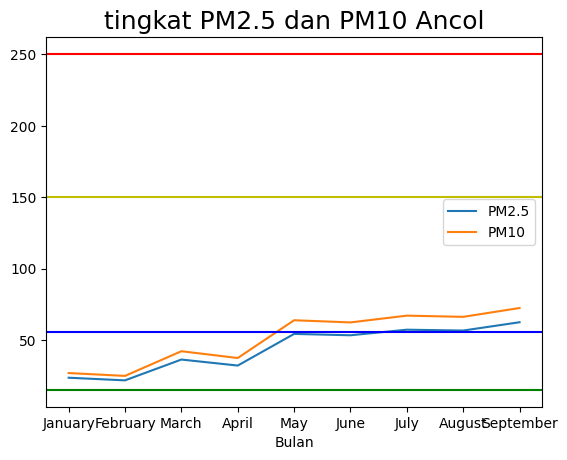

In [ ]:
plt.plot(df_ancol_mean['month'],df_ancol_mean['pm25'],df_ancol_mean['month'],df_ancol_mean['pm10'])
plt.axhline(y=15.1, color='g', linestyle='-')
plt.axhline(y=55.4, color='b', linestyle='-')
plt.axhline(y=150.4, color='y', linestyle='-')
plt.axhline(y=250.4, color='r', linestyle='-')
plt.title('tingkat PM2.5 dan PM10 Ancol', fontsize=18)
plt.xlabel('Bulan', fontsize=10)
plt.legend(['PM2.5','PM10'])
plt.show()

<ipython-input-128-3e2645efd34f>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



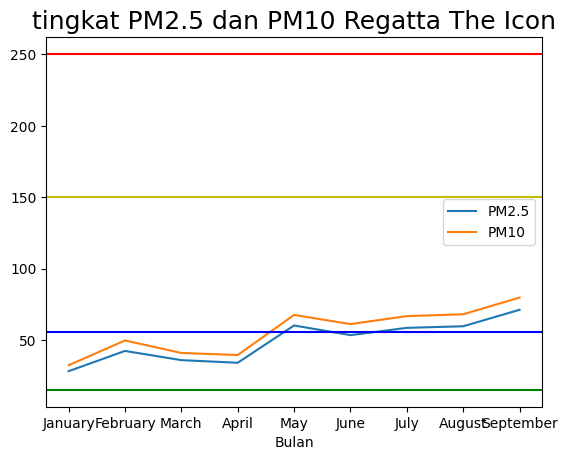

In [ ]:
df_reg=df1.loc[ df1['location'] == "Regatta The Icon" ]
df_reg_mean=df_reg.groupby('month').mean()
df_reg_mean['month'] = df_reg_mean.index
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df_reg_mean.index=pd.CategoricalIndex(df_reg_mean['month'],categories=sort_order,ordered=True)
df_reg_mean=df_reg_mean.sort_index().reset_index(drop=True)
plt.plot(df_reg_mean['month'],df_reg_mean['pm25'],df_reg_mean['month'],df_reg_mean['pm10'])
plt.axhline(y=15.1, color='g', linestyle='-')
plt.axhline(y=55.4, color='b', linestyle='-')
plt.axhline(y=150.4, color='y', linestyle='-')
plt.axhline(y=250.4, color='r', linestyle='-')
plt.title('tingkat PM2.5 dan PM10 Regatta The Icon', fontsize=18)
plt.xlabel('Bulan', fontsize=10)
plt.legend(['PM2.5','PM10'])
plt.show()

In [ ]:
df_reg_mean1=df_reg_mean
df_reg_mean1.index=df_reg_mean1['month']
df_reg_mean1

,pm25,pm10,temperature,humidity,latitude,longitude,month
month,,,,,,,
January,28.229203,32.389588,88.724138,58.365152,-6.09474,106.79309,January
February,42.403260,49.732225,88.724138,58.365152,-6.09474,106.79309,February
March,35.949656,40.972853,88.724138,58.365152,-6.09474,106.79309,March
April,34.119656,39.548787,88.724138,58.365152,-6.09474,106.79309,April
May,60.239840,67.620172,88.382309,58.574605,-6.09474,106.79309,May
June,53.465654,61.188771,73.000000,68.000000,-6.09474,106.79309,June
July,58.562564,66.794472,73.000000,68.000000,-6.09474,106.79309,July
August,59.676051,68.077226,73.000000,68.000000,-6.09474,106.79309,August
September,71.212815,79.770283,73.000000,68.000000,-6.09474,106.79309,September


<ipython-input-130-ae14747265fc>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



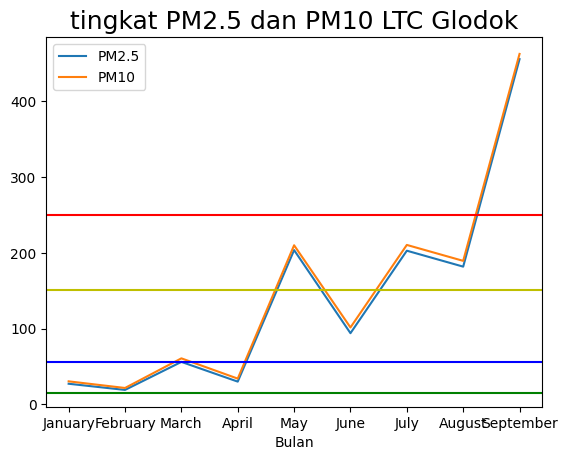

In [ ]:
df_ltc=df1.loc[ df1['location'] == "LTC Glodok" ]
df_ltc_mean=df_ltc.groupby('month').mean()
df_ltc_mean['month'] = df_ltc_mean.index
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df_ltc_mean.index=pd.CategoricalIndex(df_ltc_mean['month'],categories=sort_order,ordered=True)
df_ltc_mean=df_ltc_mean.sort_index().reset_index(drop=True)
plt.plot(df_ltc_mean['month'],df_ltc_mean['pm25'],df_ltc_mean['month'],df_ltc_mean['pm10'])
plt.axhline(y=15.1, color='g', linestyle='-')
plt.axhline(y=55.4, color='b', linestyle='-')
plt.axhline(y=150.4, color='y', linestyle='-')
plt.axhline(y=250.4, color='r', linestyle='-')
plt.title('tingkat PM2.5 dan PM10 LTC Glodok', fontsize=18)
plt.xlabel('Bulan', fontsize=10)
plt.legend(['PM2.5','PM10'])
plt.show()

<ipython-input-131-5ceee10ddd6e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



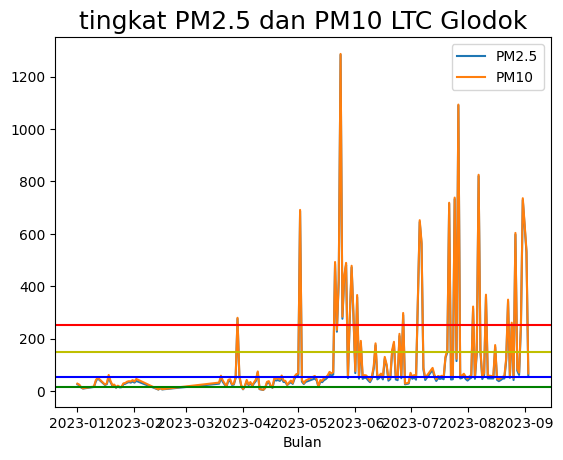

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
df_ltc_mean1=df_ltc.groupby('tanggal').mean()
df_ltc_mean1['tanggal'] = df_ltc_mean1.index
plt.plot(df_ltc_mean1['tanggal'],df_ltc_mean1['pm25'],df_ltc_mean1['tanggal'],df_ltc_mean1['pm10'])
plt.axhline(y=15.1, color='g', linestyle='-')
plt.axhline(y=55.4, color='b', linestyle='-')
plt.axhline(y=150.4, color='y', linestyle='-')
plt.axhline(y=250.4, color='r', linestyle='-')
plt.title('tingkat PM2.5 dan PM10 LTC Glodok', fontsize=18)
plt.xlabel('Bulan', fontsize=10)
plt.legend(['PM2.5','PM10'])
plt.show()

plt.figure(figsize=(10,6))

In [ ]:
df_ltc_mean1=df_ltc_mean
df_ltc_mean1.index=df_ltc_mean1['month']
df_ltc_mean1

,pm25,pm10,temperature,humidity,latitude,longitude,month
month,,,,,,,
January,27.128795,30.313294,88.724138,58.365152,-6.146273,106.81632,January
February,18.985166,21.544965,88.724138,58.365152,-6.146273,106.81632,February
March,55.994361,60.678727,88.724138,58.365152,-6.146273,106.81632,March
April,29.948833,33.911789,88.724138,58.365152,-6.146273,106.81632,April
May,203.637408,210.009640,88.770632,58.316217,-6.146273,106.81632,May
June,93.899440,101.474555,92.094521,54.002752,-6.146273,106.81632,June
July,202.825526,210.448483,91.713803,50.447544,-6.146273,106.81632,July
August,181.778590,189.403939,92.002140,50.480495,-6.146273,106.81632,August
September,455.803693,462.667064,91.616172,49.227192,-6.146273,106.81632,September


<ipython-input-133-51bd751e1909>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



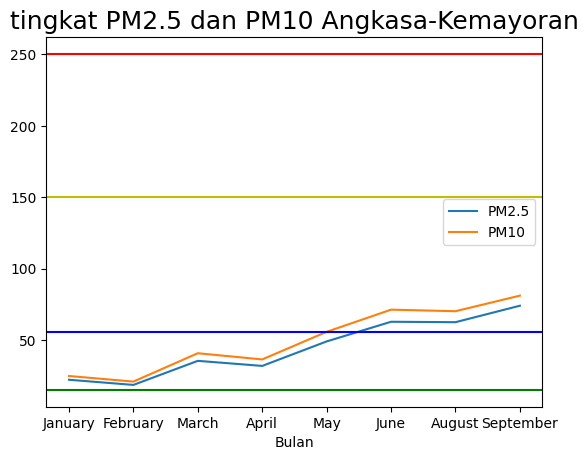

In [ ]:
df_ang=df1.loc[ df1['location'] == "Angkasa-Kemayoran" ]
df_ang_mean=df_ang.groupby('month').mean()
df_ang_mean['month'] = df_ang_mean.index
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df_ang_mean.index=pd.CategoricalIndex(df_ang_mean['month'],categories=sort_order,ordered=True)
df_ang_mean=df_ang_mean.sort_index().reset_index(drop=True)
plt.plot(df_ang_mean['month'],df_ang_mean['pm25'],df_ang_mean['month'],df_ang_mean['pm10'])
plt.axhline(y=15.1, color='g', linestyle='-')
plt.axhline(y=55.4, color='b', linestyle='-')
plt.axhline(y=150.4, color='y', linestyle='-')
plt.axhline(y=250.4, color='r', linestyle='-')
plt.title('tingkat PM2.5 dan PM10 Angkasa-Kemayoran', fontsize=18)
plt.xlabel('Bulan', fontsize=10)
plt.legend(['PM2.5','PM10'])
plt.show()

In [ ]:
df_ang_mean1=df_ang_mean
df_ang_mean1.index=df_ang_mean1['month']
df_ang_mean1

,pm25,pm10,temperature,humidity,latitude,longitude,month
month,,,,,,,
January,22.221589,24.847141,88.724138,58.365152,-6.155982,106.84253,January
February,18.605292,20.935556,88.724138,58.365152,-6.155982,106.84253,February
March,35.459253,40.790548,88.724138,58.365152,-6.155982,106.84253,March
April,31.914156,36.451825,88.724138,58.365152,-6.155982,106.84253,April
May,49.059384,55.780938,88.724138,58.365152,-6.155982,106.84253,May
June,62.830000,71.300000,92.700000,52.800000,-6.155982,106.84253,June
August,62.528527,70.222710,93.230589,47.760322,-6.155982,106.84253,August
September,74.065972,81.122186,92.160821,48.007818,-6.155982,106.84253,September


<ipython-input-167-188b1f18ead3>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



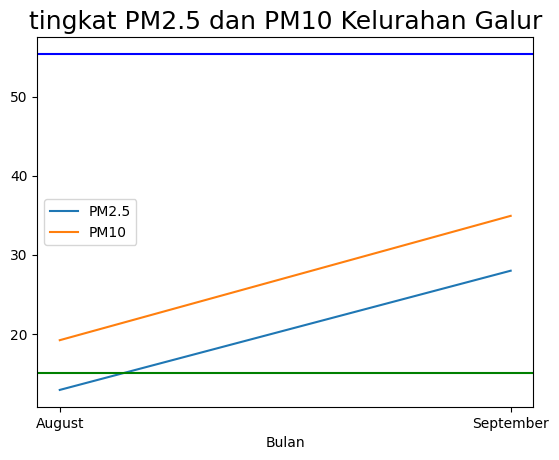

In [ ]:
df_gal=df1.loc[ df1['location'] == "Kelurahan Galur" ]
df_gal_mean=df_gal.groupby('month').mean()
df_gal_mean['month'] = df_gal_mean.index
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df_gal_mean.index=pd.CategoricalIndex(df_gal_mean['month'],categories=sort_order,ordered=True)
df_gal_mean=df_gal_mean.sort_index().reset_index(drop=True)
plt.plot(df_gal_mean['month'],df_gal_mean['pm25'],df_gal_mean['month'],df_gal_mean['pm10'])
plt.axhline(y=15.1, color='g', linestyle='-')
plt.axhline(y=55.4, color='b', linestyle='-')
plt.title('tingkat PM2.5 dan PM10 Kelurahan Galur', fontsize=18)
plt.xlabel('Bulan', fontsize=10)
plt.legend(['PM2.5','PM10'])
plt.show()

In [ ]:
df_gal_mean1=df_gal_mean
df_gal_mean1.index=df_gal_mean1['month']
df_gal_mean1

,pm25,pm10,temperature,humidity,latitude,longitude,month
month,,,,,,,
August,12.903864,19.193858,91.659581,53.717374,-6.175558,106.8544,August
September,27.981587,34.918903,91.079694,52.393299,-6.175558,106.8544,September


<ipython-input-137-a3b4d6a76972>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



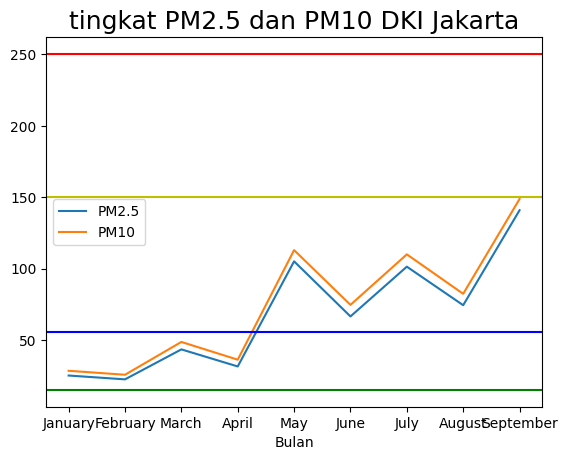

In [ ]:

df1_mean=df1.groupby('month').mean()
df1_mean['month'] = df1_mean.index
sort_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df1_mean.index=pd.CategoricalIndex(df1_mean['month'],categories=sort_order,ordered=True)
df1_mean=df1_mean.sort_index().reset_index(drop=True)
plt.plot(df1_mean['month'],df1_mean['pm25'],df1_mean['month'],df1_mean['pm10'])
plt.axhline(y=15.1, color='g', linestyle='-')
plt.axhline(y=55.4, color='b', linestyle='-')
plt.axhline(y=150.4, color='y', linestyle='-')
plt.axhline(y=250.4, color='r', linestyle='-')
plt.title('tingkat PM2.5 dan PM10 DKI Jakarta', fontsize=18)
plt.xlabel('Bulan', fontsize=10)
plt.legend(['PM2.5','PM10'])
plt.show()

<ipython-input-138-b307ef023b8a>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



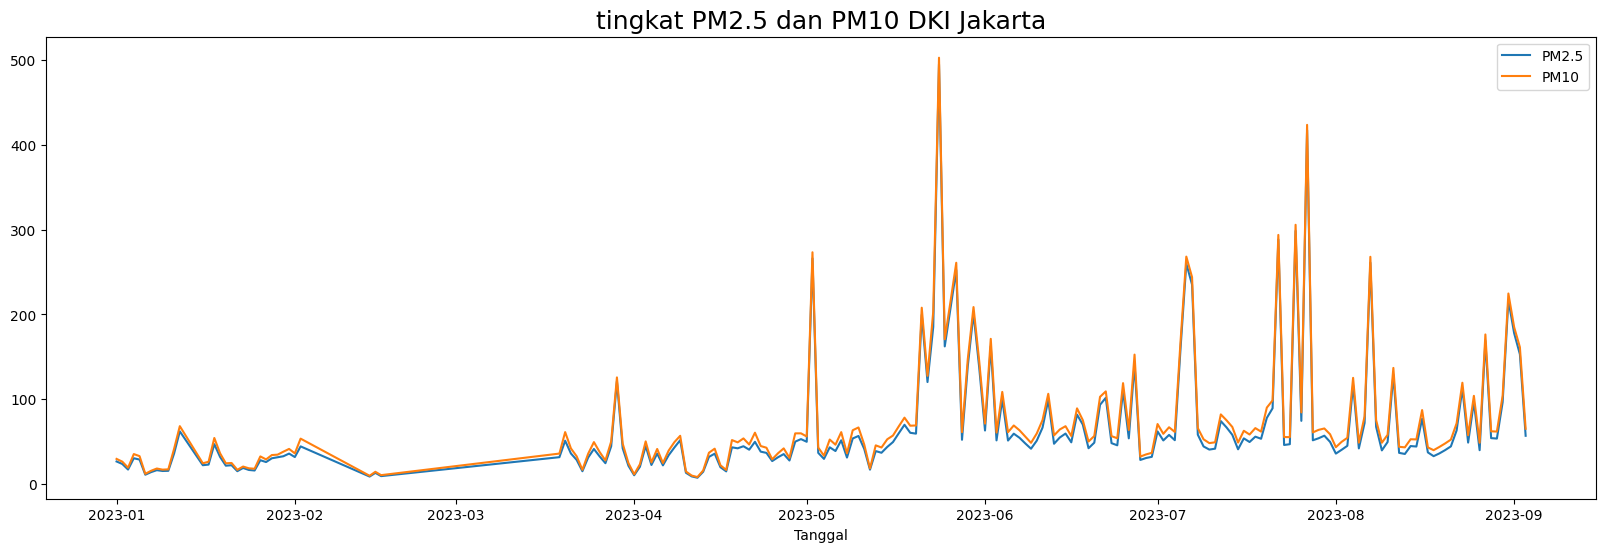

In [ ]:
plt.figure(figsize=(20,6))

df1_d=df1.groupby('tanggal').mean()
df1_d['tanggal'] = df1_d.index
plt.plot(df1_d['tanggal'],df1_d['pm25'],df1_d['tanggal'],df1_d['pm10'])
plt.title('tingkat PM2.5 dan PM10 DKI Jakarta', fontsize=18)
plt.xlabel('Tanggal', fontsize=10)
plt.legend(['PM2.5','PM10'])
plt.show()

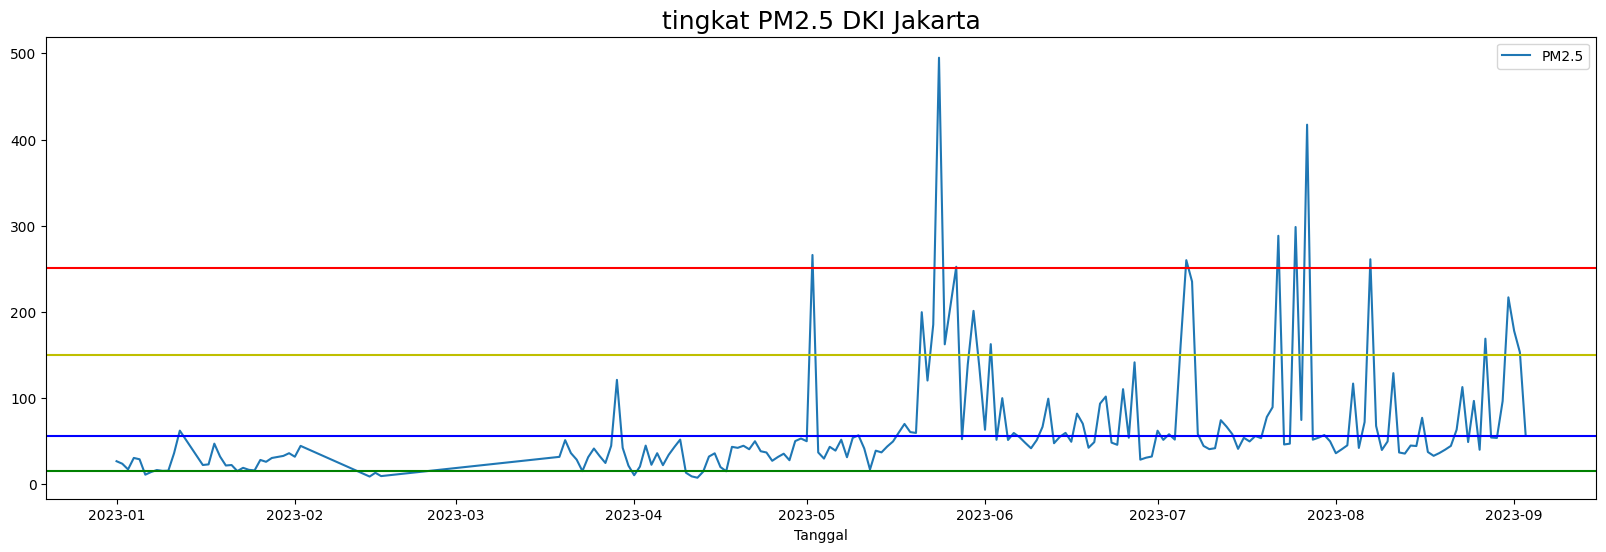

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df1_d['tanggal'],df1_d['pm25'])
plt.axhline(y=15.1, color='g', linestyle='-')
plt.axhline(y=55.4, color='b', linestyle='-')
plt.axhline(y=150.4, color='y', linestyle='-')
plt.axhline(y=250.4, color='r', linestyle='-')
plt.title('tingkat PM2.5 DKI Jakarta', fontsize=18)
plt.xlabel('Tanggal', fontsize=10)
plt.legend(['PM2.5'])
plt.show()

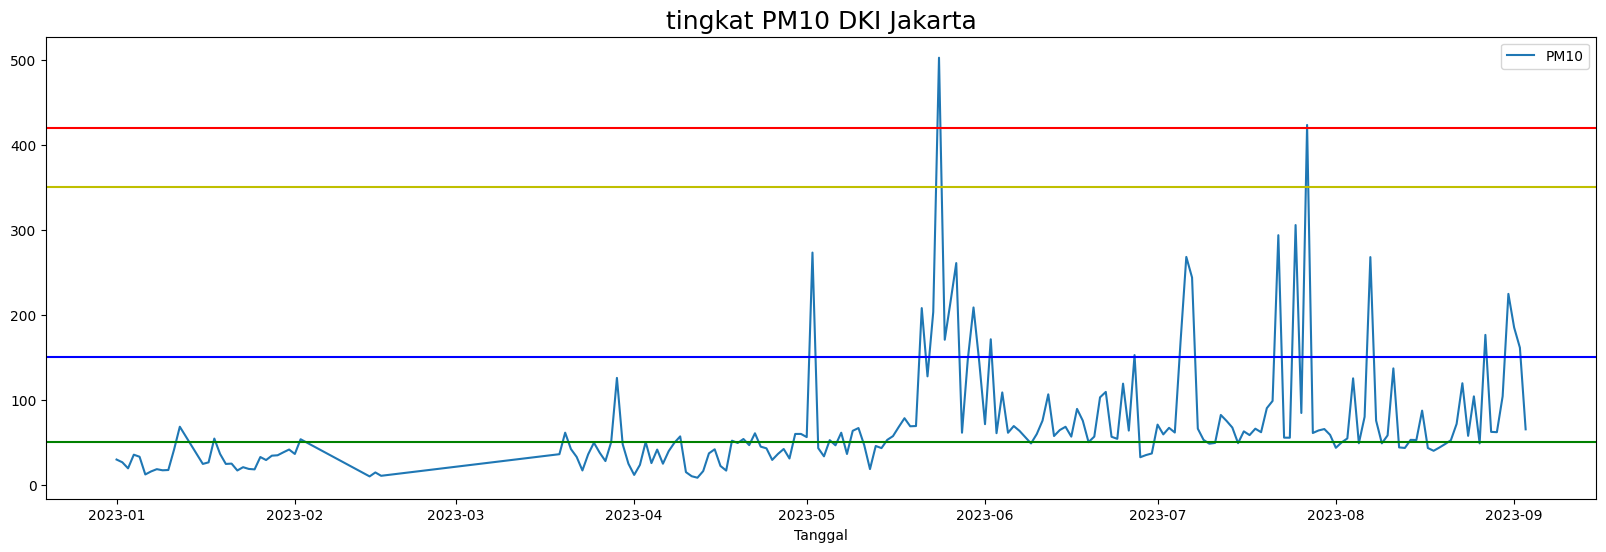

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(df1_d['tanggal'],df1_d['pm10'])
plt.axhline(y=50, color='g', linestyle='-')
plt.axhline(y=150, color='b', linestyle='-')
plt.axhline(y=350, color='y', linestyle='-')
plt.axhline(y=420, color='r', linestyle='-')
plt.title('tingkat PM10 DKI Jakarta', fontsize=18)
plt.xlabel('Tanggal', fontsize=10)
plt.legend(['PM10'])
plt.show()

In [ ]:
df1

,date,tanggal,time,pm25,pm10,temperature,humidity,location,latitude,longitude,kategori pm25,kategori pm10,month
0,2023-01-01 15:00:00+07:00,2023-01-01,15:00,36.333333,42.400000,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
1,2023-01-01 16:00:00+07:00,2023-01-01,16:00,21.800000,23.050000,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
2,2023-01-01 17:00:00+07:00,2023-01-01,17:00,24.296552,25.196552,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
3,2023-01-01 18:00:00+07:00,2023-01-01,18:00,26.783333,27.993333,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
4,2023-01-01 19:00:00+07:00,2023-01-01,19:00,33.813333,38.106667,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14357,2023-09-03 10:00:00+07:00,2023-09-03,10:00,41.536667,47.180000,91.266667,51.566667,Kelurahan Galur,-6.175558,106.85440,sedang,baik,September
14358,2023-09-03 11:00:00+07:00,2023-09-03,11:00,43.485185,49.229630,92.592593,45.592593,Kelurahan Galur,-6.175558,106.85440,sedang,baik,September
14359,2023-09-03 12:00:00+07:00,2023-09-03,12:00,37.760000,44.080000,94.066667,42.533333,Kelurahan Galur,-6.175558,106.85440,sedang,baik,September
14360,2023-09-03 13:00:00+07:00,2023-09-03,13:00,23.886667,30.910000,95.066667,42.966667,Kelurahan Galur,-6.175558,106.85440,sedang,baik,September


In [ ]:
!pip install pmdarima

In [ ]:
df1

,date,tanggal,time,pm25,pm10,temperature,humidity,location,latitude,longitude,kategori pm25,kategori pm10,month
0,2023-01-01 15:00:00+07:00,2023-01-01,15:00,36.333333,42.400000,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
1,2023-01-01 16:00:00+07:00,2023-01-01,16:00,21.800000,23.050000,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
2,2023-01-01 17:00:00+07:00,2023-01-01,17:00,24.296552,25.196552,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
3,2023-01-01 18:00:00+07:00,2023-01-01,18:00,26.783333,27.993333,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
4,2023-01-01 19:00:00+07:00,2023-01-01,19:00,33.813333,38.106667,88.724138,58.365152,Regatta The Icon,-6.094740,106.79309,sedang,baik,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14357,2023-09-03 10:00:00+07:00,2023-09-03,10:00,41.536667,47.180000,91.266667,51.566667,Kelurahan Galur,-6.175558,106.85440,sedang,baik,September
14358,2023-09-03 11:00:00+07:00,2023-09-03,11:00,43.485185,49.229630,92.592593,45.592593,Kelurahan Galur,-6.175558,106.85440,sedang,baik,September
14359,2023-09-03 12:00:00+07:00,2023-09-03,12:00,37.760000,44.080000,94.066667,42.533333,Kelurahan Galur,-6.175558,106.85440,sedang,baik,September
14360,2023-09-03 13:00:00+07:00,2023-09-03,13:00,23.886667,30.910000,95.066667,42.966667,Kelurahan Galur,-6.175558,106.85440,sedang,baik,September


In [ ]:
df_ts=df1
df_ts=df_ts.drop(columns=['tanggal', 'time','pm10','temperature','humidity','location','latitude','longitude','kategori pm25','kategori pm10','month'])
df_ts

,date,pm25
0,2023-01-01 15:00:00+07:00,36.333333
1,2023-01-01 16:00:00+07:00,21.800000
2,2023-01-01 17:00:00+07:00,24.296552
3,2023-01-01 18:00:00+07:00,26.783333
4,2023-01-01 19:00:00+07:00,33.813333
...,...,...
14357,2023-09-03 10:00:00+07:00,41.536667
14358,2023-09-03 11:00:00+07:00,43.485185
14359,2023-09-03 12:00:00+07:00,37.760000
14360,2023-09-03 13:00:00+07:00,23.886667


In [ ]:
df_ts.index = pd.to_datetime(df_ts['date'])
df_ts

,date,pm25
date,,
2023-01-01 15:00:00+07:00,2023-01-01 15:00:00+07:00,36.333333
2023-01-01 16:00:00+07:00,2023-01-01 16:00:00+07:00,21.800000
2023-01-01 17:00:00+07:00,2023-01-01 17:00:00+07:00,24.296552
2023-01-01 18:00:00+07:00,2023-01-01 18:00:00+07:00,26.783333
2023-01-01 19:00:00+07:00,2023-01-01 19:00:00+07:00,33.813333
...,...,...
2023-09-03 10:00:00+07:00,2023-09-03 10:00:00+07:00,41.536667
2023-09-03 11:00:00+07:00,2023-09-03 11:00:00+07:00,43.485185
2023-09-03 12:00:00+07:00,2023-09-03 12:00:00+07:00,37.760000


In [ ]:
df1_d=df1.groupby('tanggal').mean()
df_ts1=df1_d[137:]
df_ts1=df_ts1.drop(columns=['pm10','temperature','humidity','latitude','longitude'])
df_ts1

<ipython-input-146-d0a6406dcd28>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,pm25
tanggal,
2023-07-01,62.098579
2023-07-02,51.448214
2023-07-03,57.971379
2023-07-04,51.756123
2023-07-05,160.351807
...,...
2023-08-30,96.463017
2023-08-31,216.849020
2023-09-01,177.920980


In [ ]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df_ts1, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning:

m (12) set for non-seasonal fit. Setting to 0



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=780.127, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=762.290, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=778.127, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=760.844, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=761.268, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=758.860, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=760.295, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=759.305, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec

Best mode

In [ ]:
from pandas.tseries.offsets import DateOffset
pred_date=[df_ts1.index[-1]+ DateOffset(days=x)for x in range(0,14)]
pred_date=pd.DataFrame(index=pred_date[1:],columns=df_ts1.columns)
pred_date

,pm25
2023-09-04,NaN
2023-09-05,NaN
2023-09-06,NaN
2023-09-07,NaN
2023-09-08,NaN
2023-09-09,NaN
2023-09-10,NaN
2023-09-11,NaN
2023-09-12,NaN
2023-09-13,NaN


In [ ]:
df_ts1=pd.concat([df_ts1,pred_date])
df_ts1

,pm25
2023-07-01,62.098579
2023-07-02,51.448214
2023-07-03,57.971379
2023-07-04,51.756123
2023-07-05,160.351807
...,...
2023-09-12,NaN
2023-09-13,NaN
2023-09-14,NaN
2023-09-15,NaN


In [ ]:
df_ts1.index = pd.DatetimeIndex(df_ts1.index).to_period('D')

In [ ]:
import statsmodels.api as sm
bestmodel=sm.tsa.statespace.SARIMAX(df_ts1['pm25'],order=(2, 1, 0),seasonal_order=(0,0,0,12))
results1=bestmodel.fit()

<Axes: >

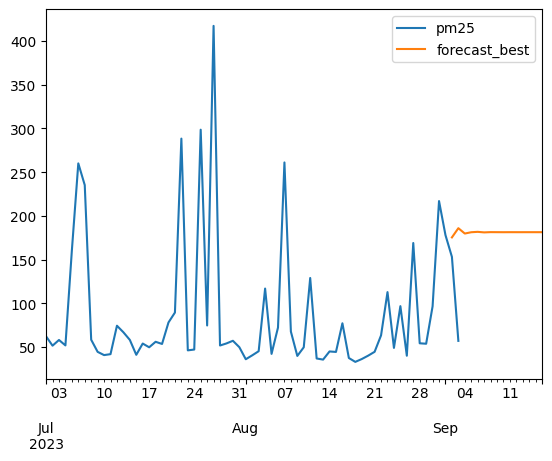

In [ ]:

df_ts1['forecast_best']=results1.predict(start=63,end=77,dynamic=True)
df_ts1[['pm25','forecast_best']].plot()


In [ ]:
df_ts1

,pm25,forecast_best
2023-07-01,62.098579,NaN
2023-07-02,51.448214,NaN
2023-07-03,57.971379,NaN
2023-07-04,51.756123,NaN
2023-07-05,160.351807,NaN
...,...,...
2023-09-12,NaN,181.264211
2023-09-13,NaN,181.264893
2023-09-14,NaN,181.267518
2023-09-15,NaN,181.265691


In [ ]:
df_ts1['forecast_best'][65:78]

2023-09-04    179.718492
2023-09-05    181.211645
2023-09-06    181.653515
2023-09-07    181.031989
2023-09-08    181.327173
2023-09-09    181.280749
2023-09-10    181.243078
2023-09-11    181.277644
2023-09-12    181.264211
2023-09-13    181.264893
2023-09-14    181.267518
2023-09-15    181.265691
2023-09-16    181.266257
Freq: D, Name: forecast_best, dtype: float64

In [ ]:
df_ts1['tanggal']=df_ts1.index
df_ts1

,pm25,forecast_best,tanggal
2023-07-01,62.098579,NaN,2023-07-01
2023-07-02,51.448214,NaN,2023-07-02
2023-07-03,57.971379,NaN,2023-07-03
2023-07-04,51.756123,NaN,2023-07-04
2023-07-05,160.351807,NaN,2023-07-05
...,...,...,...
2023-09-12,NaN,181.264211,2023-09-12
2023-09-13,NaN,181.264893,2023-09-13
2023-09-14,NaN,181.267518,2023-09-14
2023-09-15,NaN,181.265691,2023-09-15


In [ ]:
dfp = pd.read_csv("Penyebab Kematian di Indonesia yang Dilaporkan - Clean.csv")
dfp.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?fil...
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?fil...
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?fil...


In [ ]:
dfp.info()

In [ ]:
dfp_cause=dfp.groupby(['Cause']).sum() ## jumlah

<ipython-input-158-5f517c940b8a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
dfp_cause = dfp_cause.drop(columns=['Year','Data Redundancy'])
dfp_cause

,Total Deaths
Cause,
AIDS,7385
Abrasi Air Laut,0
Aksi Teror dan Sabotase,42
Angin Puting Beliung,100
Angin Siklon Tropis,37
...,...
Tsunami Aceh (Meninggal),129171
Tuberkulosis,39315
Tuberkulosis paru,3852


<Axes: ylabel='Cause'>

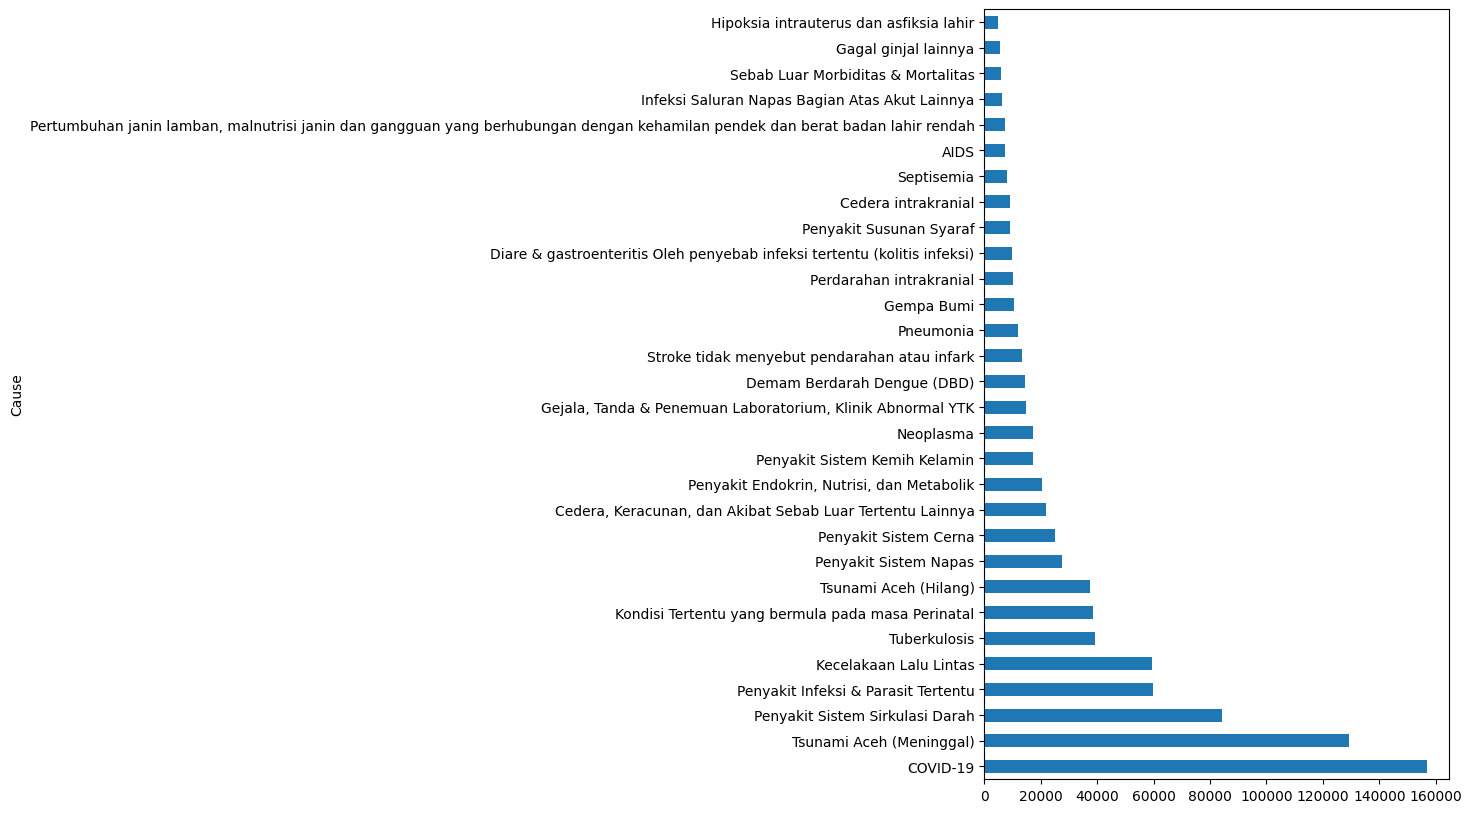

In [ ]:
plt.figure(figsize=(6,10))
cause30=dfp_cause['Total Deaths'].nlargest(n=30)
cause30.plot(kind='barh')


Pneumonia dan Tuberkulosis adalah penyakit yang dapat disebabkan oleh polusi udara

In [ ]:
cause=dfp_cause.sort_values(by="Total Deaths",ascending=False)

In [ ]:
cause['Penyebab'] = cause.index

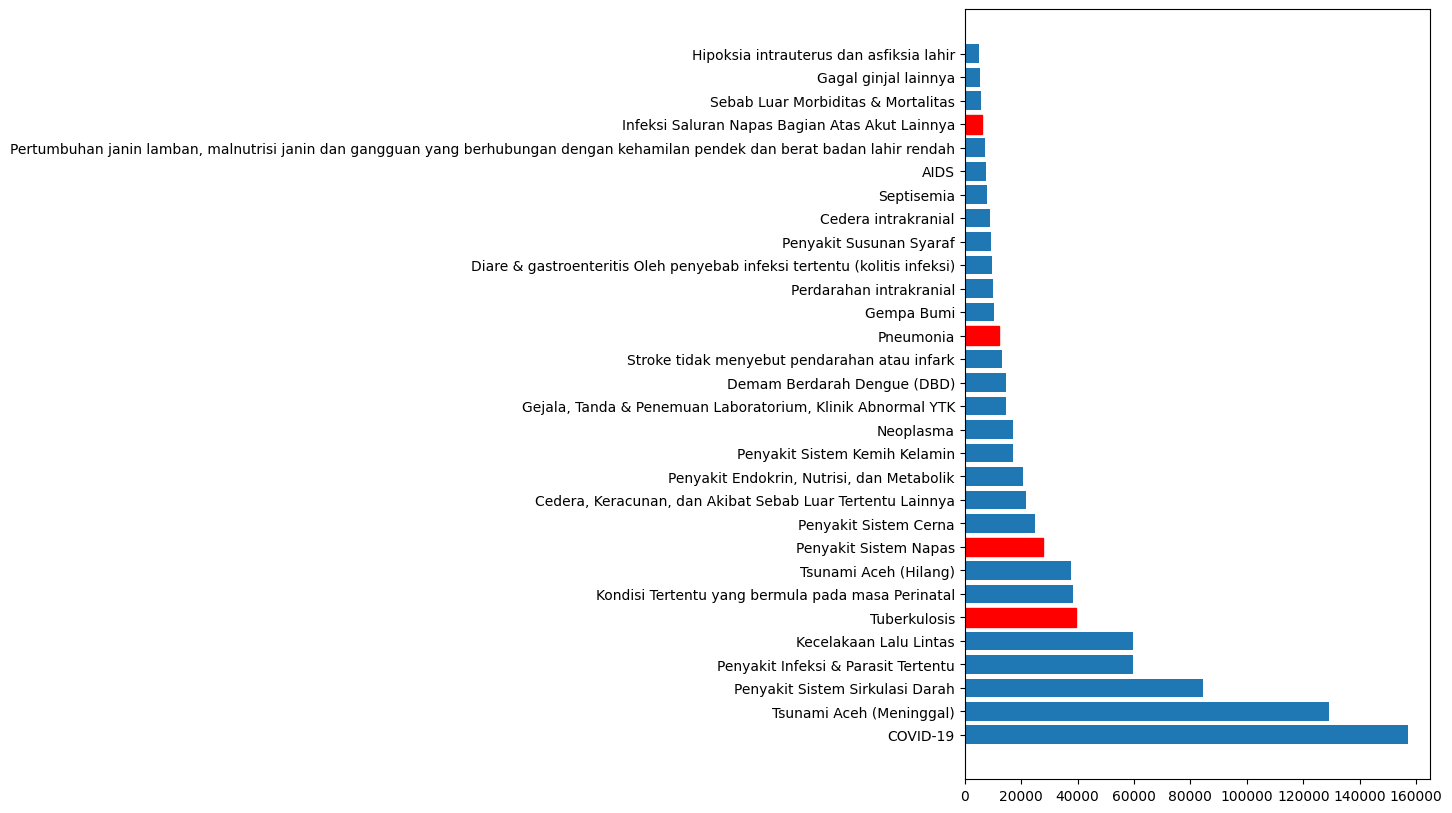

In [ ]:
plt.figure(figsize=(6,10))
barlist=plt.barh(cause['Penyebab'][:30], cause['Total Deaths'][:30])
barlist[5].set_color('r')
barlist[8].set_color('r')
barlist[17].set_color('r')
barlist[26].set_color('r')
plt.show()